# **MLS 0: Pre-work for Computer Vision**


**OpenCV** (Open Source Computer Vision Library) is an open-source library that includes hundreds of Computer Vision algorithms. It provides a common interface for a wide range of image processing and computer vision tasks, including image filtering, feature detection, object detection, and more.

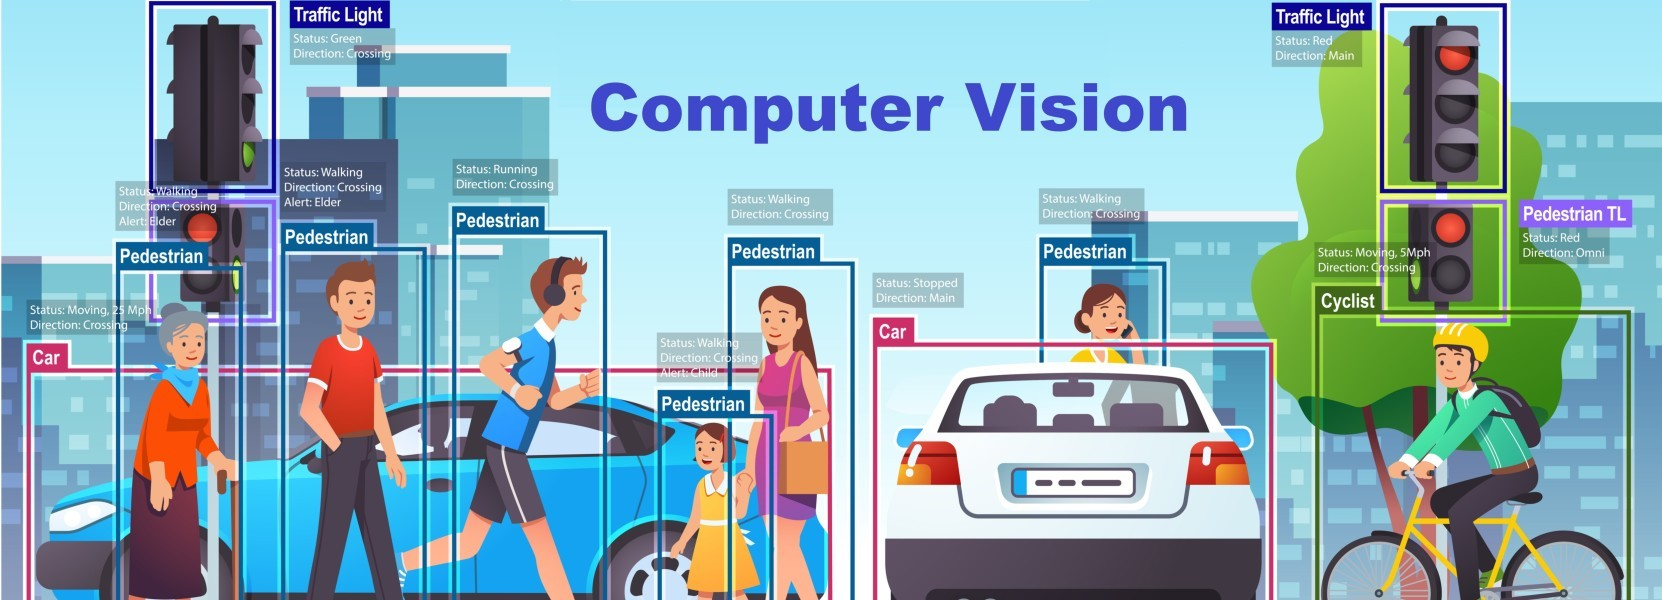

## **Importing the libraries**


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import warnings

warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Reading an Image using OpenCV**



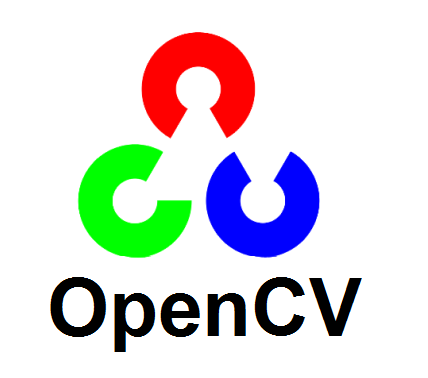

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Prac Data/Duck_image.jpg")

## **Checking if the image has been loaded successfully**

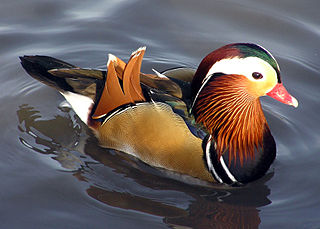

In [ ]:
if img is None:
  print("Error: Could not read image.")
else:
  #show image
  cv2_imshow(img)

In Google Colab, you can use the shape attribute of the image array to check the shape of an image. 

The shape attribute returns a tuple of the form (height, width, channels), where **height and width** are the dimensions of the image in pixels, and **channels** is the number of color channels in the image.

In [ ]:
print("Shape of the image:", img.shape)
print("Size of the image:", img.size)

Shape of the image: (229, 320, 3)
Size of the image: 219840


##**Image Functions**

### **Rotating the image**

In [ ]:
import imutils

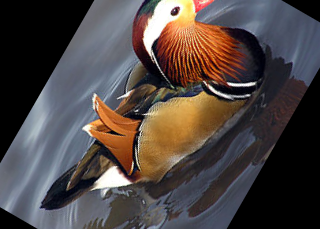

In [ ]:
rotated = imutils.rotate(img,60)
cv2_imshow(rotated)

### **Translating (moving) the image**
This is used to simply translate (moving) the image to a different location. In this method, we simply pass the image and the new coordinates it needs to be translated to.

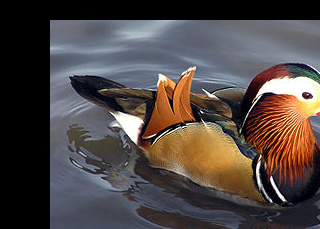

In [ ]:
tran = imutils.translate(img,50,20)
cv2_imshow(tran)

### **Flipping the image**
This is used to flip the image - flipping is achieved horizontally by parameter 1, 0 for vertical flipping, and -1 for both.

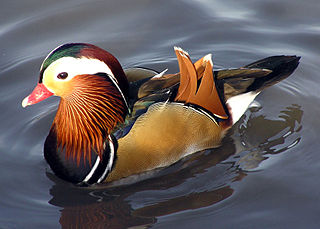

In [ ]:
flip = cv2.flip(img,1)
cv2_imshow(flip)

### **Flipping Vertically**

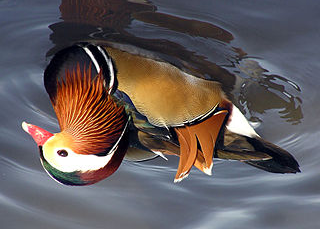

In [ ]:
flip = cv2.flip(img,-1)
cv2_imshow(flip)

### **Resizing with a Scaling Factor**

Original shape : (229, 320, 3)
New shape      : (91, 128, 3)


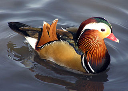

In [ ]:
height = img.shape[0]
width = img.shape[1]

# We want the new image to be 40% of the original image
scale_factor = 0.4
new_height = int(height * scale_factor)  # 229 * 0.4 = 91
new_width = int(width * scale_factor)    # 320 * 0.4 = 128
dimensions = (new_width, new_height)     # (91, 128)
new_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)
print("Original shape :", img.shape )
print("New shape      :", new_image.shape)
cv2_imshow(new_image);

### **Grayscale Conversion**

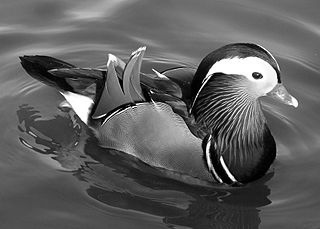

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

### **HSV Conversion**

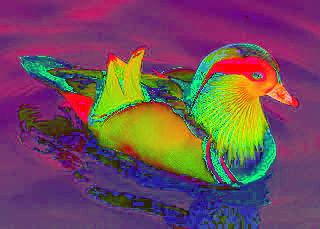

In [ ]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2_imshow(img_hsv)

### **Blurring the image**
By blurring an image, the sharp variations in pixel intensity between multiple pixels are dampened. This has historically been an important image processing technique, especially for manual / hands-crafted feature extraction approaches.

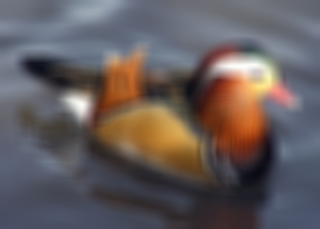

In [ ]:
kernelsizes =[(3,3), (9,9), (15,15)]
for (x,y) in kernelsizes:
  blurred = cv2.blur(img,(x,y))

cv2_imshow(blurred)


### **The Gaussian Blur**

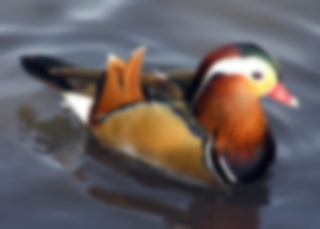

In [ ]:
kernelsizes =[(3,3), (9,9), (15,15)]
for (x,y) in kernelsizes:
  blurred = cv2.GaussianBlur(img,(x,y),0)

cv2_imshow(blurred)

### **The Median Blur**

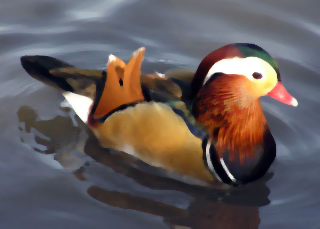

In [ ]:
median = cv2.medianBlur(img,5)
cv2_imshow(median)

## **Edge Detection and Kernels**

We will try to understand **edge detection** using various kinds of **handcrafted filters,** such as:
<br></br>
**1. The Canny Filter**

**2. The Prewitt Filter**

**3. The Sobel Filter**

**4. The Laplacian Filter**

### **Canny Edge Detection**

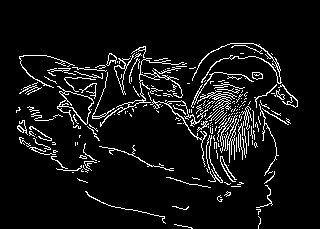

In [ ]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  ### Convert to grayscale
imgEdge = cv2.Canny(imgGray, 250,150)            ### Canny edge detector
cv2_imshow(imgEdge)

###**Prewitt Edge Detection**

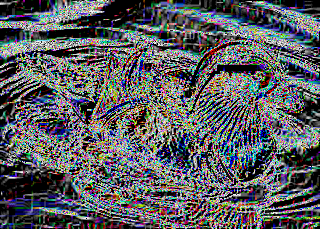

In [ ]:
# Define the Prewitt kernels for the x and y direction
prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

# Apply the kernels to the image
img_prewitt_x = cv2.filter2D(img, -1, prewitt_x)
img_prewitt_y = cv2.filter2D(img, -1, prewitt_y)

# Combine the results in a single image
img_prewitt = np.sqrt(np.square(img_prewitt_x) + np.square(img_prewitt_y))

# Normalize the image to the range [0, 255]
img_prewitt = (img_prewitt / np.max(img_prewitt)) * 255

# Display the resulting image
cv2_imshow(img_prewitt)

### **Sobel Edge Detection**

The Sobel operator uses two 3X3 kernels which are convolved with the original image to calculate approximations of the derivatives - one for horizontal changes, and one for vertical.

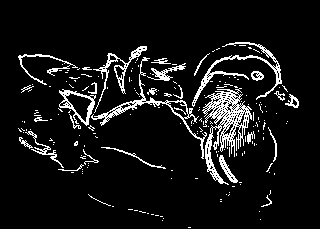

In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the Sobel operator
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient = cv2.magnitude(sobelx, sobely)

# Normalize the gradient
normalized_gradient = cv2.normalize(gradient, None, 0, 255, cv2.NORM_MINMAX)

# Convert the gradient to an 8-bit integer
gradient_8bit = normalized_gradient.astype(np.uint8)

# Apply a threshold to the gradient to create a binary edge map
ret, thresholded_gradient = cv2.threshold(gradient_8bit, 50,255,cv2.THRESH_BINARY)
cv2_imshow(thresholded_gradient)



### **Laplacian Edge detection**

Laplacian edge detection is another method for detecting edges in an image. It is based on the Laplacian operator, which is used to calculate the second derivative of the image intensity at each point. The Laplacian operator is defined as the divergence of the gradient of the image, and can be calculated using the following kernel                   
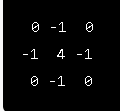


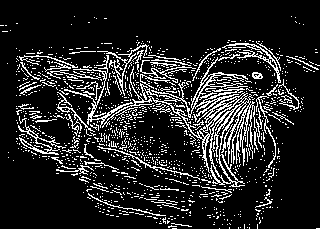

In [ ]:

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply the Laplacian operator
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3)

# Normalize the Laplacian output
laplacian = cv2.normalize(laplacian, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

# Apply a threshold to the Laplacian output to create a binary edge map
_, thresholded_laplacian = cv2.threshold(laplacian, 50, 255, cv2.THRESH_BINARY)

# Display the edge map
cv2_imshow(thresholded_laplacian)


### Let us see both these edge detectors in one frame

In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

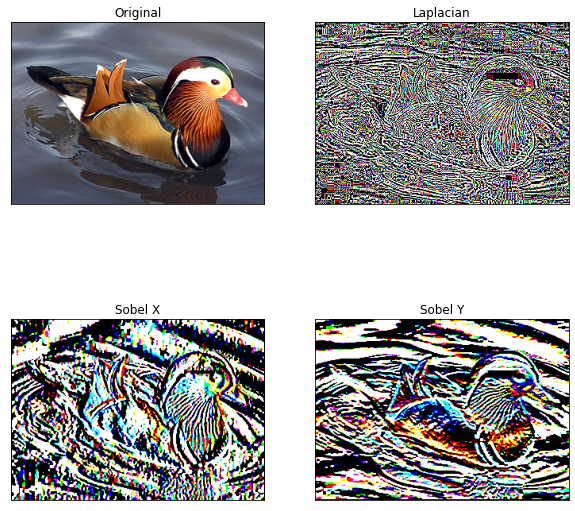

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img, cmap ="gray")
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian)
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx)
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely)
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])


plt.show()

### **Image Cropping**

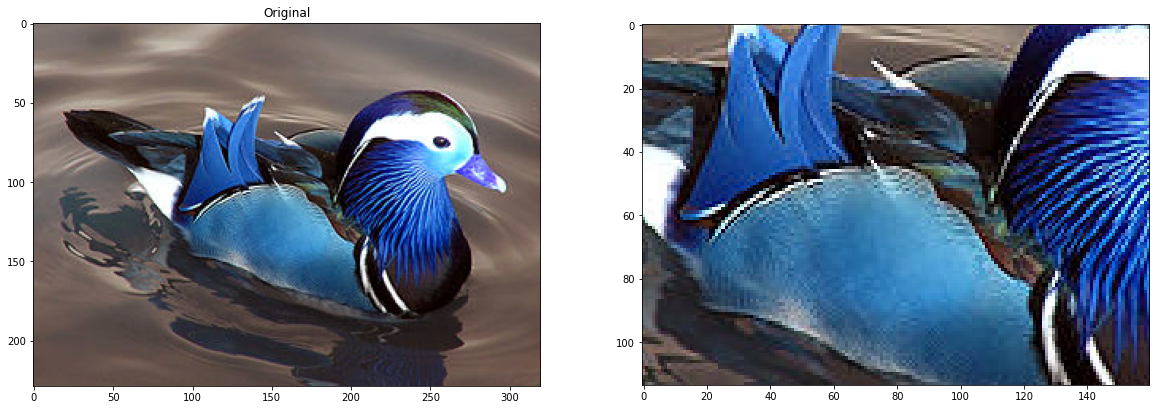

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(
figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(img)
hgt, wdt = img.shape[:2]
start_row, start_col = int(hgt * .25), int(wdt * .25)
end_row, end_col = int(hgt * .75), int(wdt * .75)
cropped = img[start_row:end_row , start_col:end_col]
plt.subplot(2, 2, 2)
plt.imshow(cropped)

### **Image Sharpening**



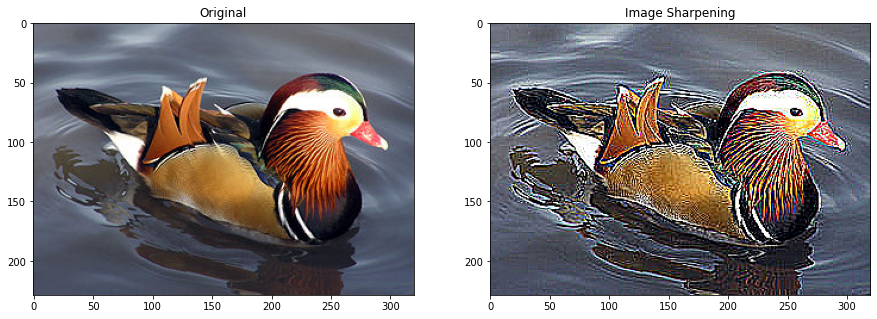

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(img)
kernel_sharpening = np.array([[-1,-1,-1], 
                              [-1,9,-1], 
                              [-1,-1,-1]])
sharpened = cv2.filter2D(img, -1, kernel_sharpening)
plt.subplot(1, 2, 2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

##**Image Channels**

### <b> Conversion of RGB to Grayscale


<b> The grayscale image is obtained by finding the average of the three channels of an RGB image.</b>
*   The Mathematical Formula to convert an RGB image to grayscale is as shown below:

<b>
<center><h1>
$\frac{(R+G+B)}{3}$



Let use a new library to work on grayscale images

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
image = Image.open("/content/drive/MyDrive/Prac Data/Duck_image.jpg")

# Extracting pixel map:
pixel_matrix = image.load()

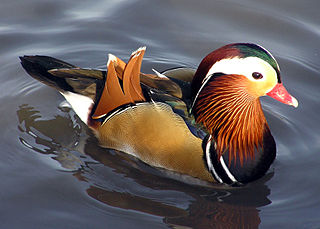

In [ ]:
display(image)

In [ ]:
width, height = image.size
print(width, height)

320 229


In [ ]:
for i in range(width):
    for j in range(height):
        
        # getting the RGB pixel values.
        r, g, b,= image.getpixel((i, j))
          
        # Apply formula of grayscale:
        
        grayscale = (r+g+b)/3  # grayscale normal average

        # setting the pixel value.
        pixel_matrix[i, j] = (int(grayscale), int(grayscale), int(grayscale))

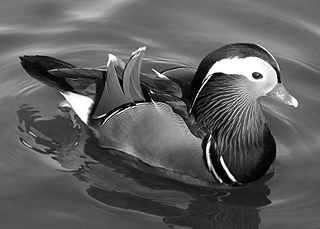

In [ ]:
display(image)


*   This common formula for obtaining a grayscale image is theoretically correct, but an improved formula has been obtained by researchers from the weighted average of the pixel intensities of red, blue, and green colors which can be shown as:

<b>
<center><h1>
${(0.299R+0.587G+0.114B)}$

In [ ]:
for i in range(width):
    for j in range(height):
        
        # getting the RGB pixel values.
        r, g, b,= image.getpixel((i, j))
          
        # Apply formula of weighted wavelengths to obtain grayscale:

        grayscale = (0.299*r + 0.587*g + 0.114*b)   # grayscale weighted average

        # setting the pixel value.
        pixel_matrix[i, j] = (int(grayscale), int(grayscale), int(grayscale))
  

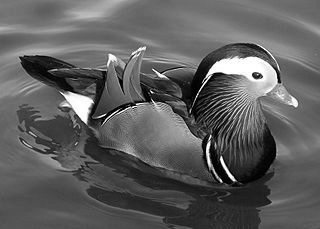

In [ ]:
display(image)

### <b> Conversion of RGB to HSV

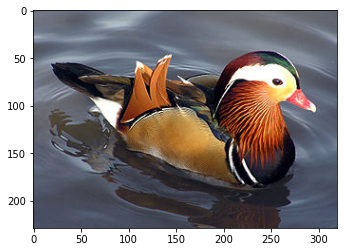

In [ ]:
image = Image.open("/content/drive/MyDrive/Prac Data/Duck_image.jpg")
image=image.convert('HSV')
plt.imshow(image)

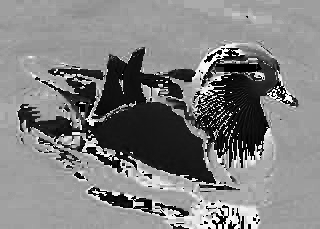

In [ ]:
display(image.getchannel('H'))

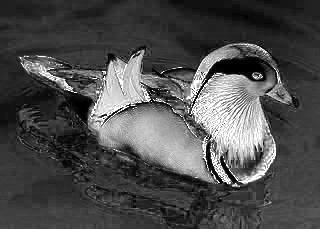

In [ ]:
display(image.getchannel('S'))

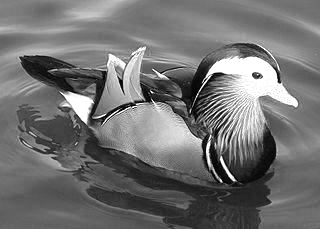

In [ ]:
display(image.getchannel('V'))

### **Visualizing the three channels of an RGB image**

In [ ]:
b,g,r = cv2.split(img)

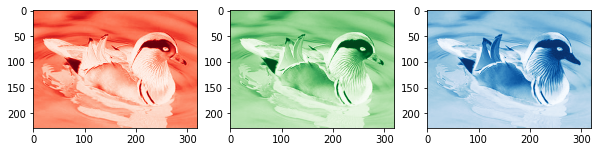

In [ ]:
fig, ax = plt.subplots(1, 3, figsize = (10,10))
arr=[r,g,b]
for i, cmap in enumerate(['Reds','Greens','Blues']):
    ax[i].imshow(arr[i], cmap=cmap) 

## **Padding**

---
There are a few reasons why padding might be used:

- To preserve the spatial size of the image or feature map during convolution. 
- Without padding, the size of the feature map will decrease with each convolution operation, which can be problematic in some cases.

Following is the syntax used

`image = cv2.copyMakeBorder(src, top, bottom, left, right, borderType)`


Where src is your source image and top, bottom, left, right are the padding around the image.

In [ ]:
#padding
constant= cv2.copyMakeBorder(img,10,10,10,10,cv2.BORDER_CONSTANT,value=0)

In [ ]:
constant

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

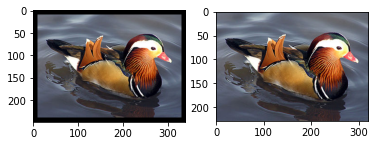

In [ ]:
plt.subplot(1,2,1)
plt.imshow(constant)
plt.subplot(1,2,2)
plt.imshow(img)

## **Pooling**

Pooling is a technique used in image processing and convolutional neural networks (CNNs) to reduce the spatial size of an image or feature map.

The most common pooling techniques are max pooling and average pooling.

In [ ]:
# Import the TensorFlow library
import tensorflow as tf

# Reshape the input tensor to a 4-dimensional tensor of shape (1, 229, 320, 3)
x = tf.reshape(img, [1, 229, 320, 3])

# Create a MaxPooling2D layer with pool_size=(5, 5), strides=(2, 2) and padding='valid'
max_pool_2d = tf.keras.layers.MaxPooling2D(pool_size=(5, 5),
   strides=(2, 2), padding='valid')

# Pass the reshaped tensor 'x' as input to the max_pool_2d layer
# This applies 2D max pooling on the input tensor, performing down-sampling of the spatial dimensions
max_pool_2d(x)

<tf.Tensor: shape=(1, 113, 158, 3), dtype=uint8, numpy=
array([[[[116, 120, 132],
         [115, 119, 131],
         [115, 119, 131],
         ...,
         [100, 104, 115],
         [ 98, 102, 113],
         [ 97, 101, 112]],

        [[117, 121, 133],
         [116, 120, 132],
         [115, 119, 131],
         ...,
         [ 99, 103, 114],
         [ 98, 102, 113],
         [ 97, 101, 112]],

        [[117, 121, 133],
         [116, 120, 132],
         [115, 119, 131],
         ...,
         [ 98, 102, 113],
         [ 98, 102, 113],
         [ 98, 102, 113]],

        ...,

        [[ 75,  82, 101],
         [ 75,  82, 101],
         [ 76,  82, 101],
         ...,
         [ 80,  91, 116],
         [ 80,  91, 114],
         [ 81,  90, 116]],

        [[ 75,  82, 103],
         [ 75,  82, 103],
         [ 76,  82, 103],
         ...,
         [ 81,  90, 116],
         [ 82,  93, 114],
         [ 82,  94, 116]],

        [[ 75,  82, 104],
         [ 75,  82, 104],
         [ 75,  82

Let us plot the images

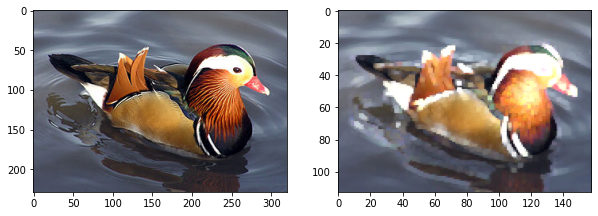

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(max_pool_2d(x)[0])

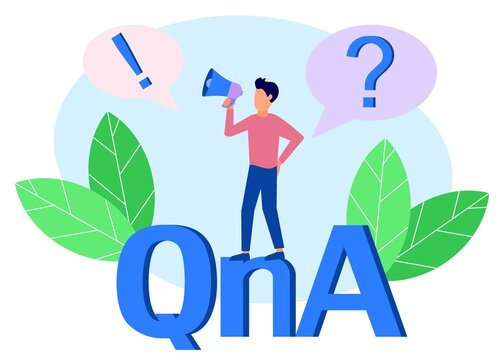